# Isle Royale Wolf & Moose Population Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.tree as skt
import sklearn.ensemble as skens

## Introduction

### Background

In this project, I will analyze two data sets from "Wolves and Moose of Isle Royale" project. The data sets contain information about the populations of wolves and moose on Isle Royale, an island in Lake Superior. The data sets include information about the number of wolves and moose on the island, as well as other variables that may be related to the populations of wolves and moose.

> Isle Royale is a remote wilderness island, isolated by the frigid waters of Lake Superior, and home to populations of wolves and moose. As predator and prey, their lives and deaths are linked in a drama that is timeless and historic. Their lives are historic because we have been documenting their lives for more than five decades. This research project is the longest continuous study of any predator-prey system in the world. ([Source](https://isleroyalewolf.org/overview/overview/at_a_glance.html))

Take a look at the most recent [Annual Report](https://isleroyalewolf.org/sites/default/files/annual-report-pdf/WolfMooseReport_2024_final-web.pdf) to learn more about the project.


## Data

The data for this project are contained in two CSV files:

In [2]:
wolf_moose_yearly = pd.read_csv("https://github.com/UM-Data-Science-101/final-project/raw/refs/heads/main/wolf_moose_yearly.csv", na_values = ["NA", "N/A", "N/A yet", "NA yet"])
moose_deaths = pd.read_csv("https://github.com/UM-Data-Science-101/final-project/raw/refs/heads/main/moose_deaths.csv")

The `wolf_moose_yearly` data set contains yearly counts of wolf and moose population, along with variables about the environment and other factors that may be related to the populations. The `moose_deaths` data set contains information about the age and size of decreased moose on Isle Royale.

Here are the number of rows and columns of each dataset along with the first 5 rows:

In [3]:
print(wolf_moose_yearly.shape)
print(wolf_moose_yearly.columns)
wolf_moose_yearly.head()

(61, 15)
Index(['year', 'wolves', 'moose', 'kill rate', 'predation rate',
       'moose recruitment rate', 'moose mean age excluding calves',
       'July-Sept (temp, F)', 'Apr-May (temp, F)', 'Jan-Feb (temp, F)',
       'May-Aug (precip, inches)', 'NAO (DJFM - station based)',
       'NAO - annual', 'snow.depth (cm)', 'ice bridges (0=none, 1 = present)'],
      dtype='object')


,year,wolves,moose,kill rate,predation rate,moose recruitment rate,moose mean age excluding calves,"July-Sept (temp, F)","Apr-May (temp, F)","Jan-Feb (temp, F)","May-Aug (precip, inches)",NAO (DJFM - station based),NAO - annual,snow.depth (cm),"ice bridges (0=none, 1 = present)"
0,1959,20,538,NaN,NaN,20.0,5.82,61.200,43.9,1.40,16.80,-0.37,1.83,NaN,0
1,1960,22,564,NaN,NaN,14.3,6.14,60.667,43.4,8.45,12.08,-1.54,-1.88,NaN,0
2,1961,22,572,NaN,NaN,19.5,6.27,60.967,41.4,9.75,8.94,1.80,0.47,NaN,1
3,1962,23,579,NaN,NaN,16.5,6.11,57.900,42.6,2.15,16.01,-2.38,-1.05,NaN,1
4,1963,20,596,NaN,NaN,21.2,5.76,60.733,43.5,-0.35,14.10,-3.60,-2.16,NaN,1


In [4]:
print(moose_deaths.shape)
print(moose_deaths.columns)
moose_deaths.head()

(662, 8)
Index(['Sex', 'Year of birth', 'Cranial Volume (cm3)',
       'Winter temperature (standardized)', 'Moose abundance (standardized)',
       'Wolf abundance (standardized)', 'Winter temperature (categorical)',
       'Age at death'],
      dtype='object')


,Sex,Year of birth,Cranial Volume (cm3),Winter temperature (standardized),Moose abundance (standardized),Wolf abundance (standardized),Winter temperature (categorical),Age at death
0,Male,1989,1627.769,0.817,0.629,-1.055,warm,5
1,Male,1989,1877.514,0.817,0.629,-1.055,warm,6
2,Male,1989,2015.398,0.817,0.629,-1.055,warm,6
3,Male,1988,1551.487,-0.411,0.135,-1.055,cold,7
4,Male,1988,2125.064,-0.411,0.135,-1.055,cold,7


### Codebook




|Vairable Name|Description|Type|
|---|:--|--:|
|year|The year the data was collected in| Numeric, Discrete|
|wolves|The wolf population|Numeric, Discrete|
|moose|The moose population|Numeric, Discrete|
|kill rate|How frequently wolves kill moose. Measured in kills per wolf per month.|Numeric, Continuous|
|predation rate|The proportion of moose each year that are killed by wolves.|Numeric, Continuous|
|moose recruitment rate|the proportion of the moose population that is calves|Numeric, Continuous|
|moose mean age excluding calves|The average age of the moose population excluding calves.|Numeric, Continuous|
|July-Sept/Apr-May/Jan-Feb (temp, F)|The temperature in fahrenheit in the respective month range.|Numeric, Continuous|
|May-Aug (precip, inches)|The precipition in inches in the month range|Numeric, Continuous|
|NAO (DJFM - station based)/annual|The difference of normalized sea level pressure (SLP)<br> between Lisbon, Portugal and Stykkisholmur/Reykjavik, <br>Iceland since 1864. Measured monthly or yearly|Numeric, Continuous|
|snow.depth (cm)|The snow depth in cm|Numeric, Continuous|
|ice bridges (0=none, 1 = present)|If there was an ice bridge or not.|Categorical, Binary|
|Sex|The sex of the moose.|Categorical, Binary|
|Year of birth|When the moose was born.|Numeric, Discrete|
|Cranial Volume (cm3)|The cranial volume of the moose in cm3.|Numeric, Continuous|
|Winter temperature (standardized)|Standardized winter temperature.|Numeric, Continuous|
|Moose abundance (standardized)|Standardized moose abundance.|Numeric, Continuous|
|Wolf abundance (standardized)|Standardized wolf abundance.|Numeric, Continuous|
|Winter temperature (categorical)|Winter temperature.|Categorical, Ordinal|
|Age at death|The age of the moose when it died.|Numeric, Discrete|



### Data Cleaning
For this project, I decided to drop any rows with missing values.

In [5]:
print(wolf_moose_yearly.isna().sum())
print(moose_deaths.isna().sum())

year                                  0
wolves                                0
moose                                 0
kill rate                            13
predation rate                       13
moose recruitment rate                3
moose mean age excluding calves      12
July-Sept (temp, F)                   1
Apr-May (temp, F)                     0
Jan-Feb (temp, F)                     0
May-Aug (precip, inches)              1
NAO (DJFM - station based)            1
NAO - annual                          2
snow.depth (cm)                      16
ice bridges (0=none, 1 = present)     0
dtype: int64
Sex                                  0
Year of birth                        0
Cranial Volume (cm3)                 0
Winter temperature (standardized)    0
Moose abundance (standardized)       0
Wolf abundance (standardized)        0
Winter temperature (categorical)     0
Age at death                         0
dtype: int64


## Exploratory Data Analysis
### Univariate Exploration
#### Discrete Variable

<Axes: xlabel='Age at death', ylabel='count'>

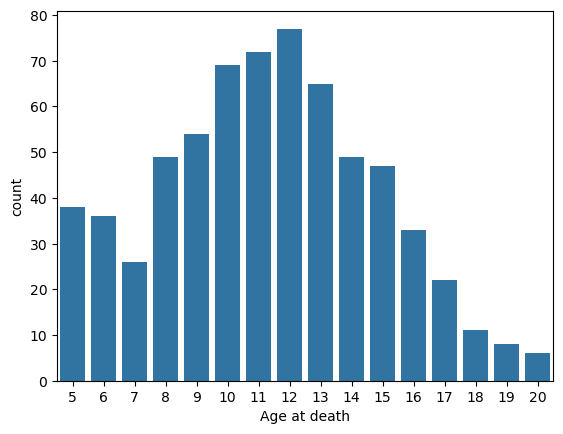

In [6]:
sb.countplot(data = moose_deaths, x = "Age at death")

The typical age that a moose dies at is ~12.

#### Numeric Variable

<Axes: xlabel='Cranial Volume (cm3)', ylabel='Count'>

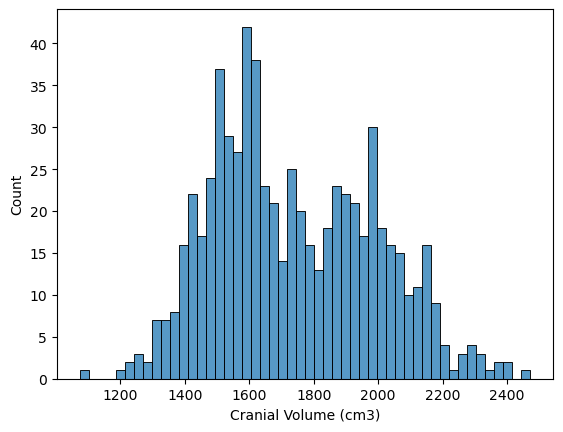

In [7]:
sb.histplot(data = moose_deaths, x = "Cranial Volume (cm3)", bins=50)

Cranial volumne of the killed moose have a pretty large range. The graph is bimodal with peaks at ~1600cm3 and ~1990cm3.

### Multivariate Exploration


#### Discrete-Discrete

21.065573770491802

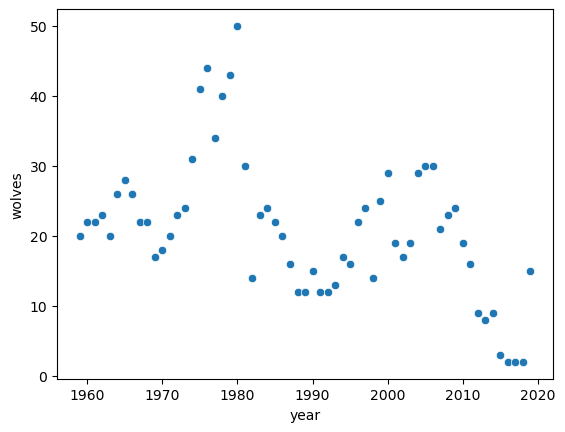

In [8]:
#year vs wolves
sb.scatterplot(data = wolf_moose_yearly, x = "year", y = "wolves")
wolf_moose_yearly["wolves"].mean()

The population of wolves peaked in 1980 at 50 wolves. It then has decreased but is on the rise again.

#### Discrete-Numeric

0.09513513513513513

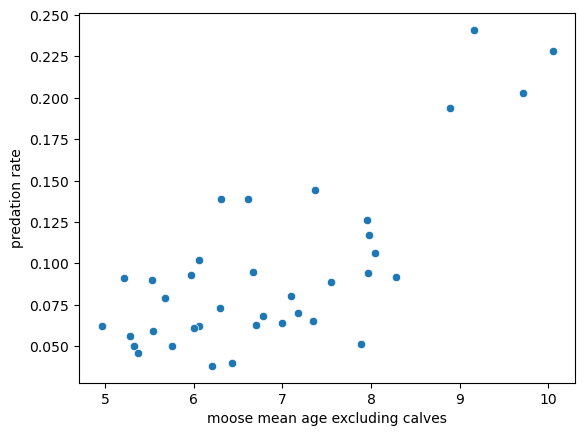

In [9]:
#wolves vs predation rate
temp = wolf_moose_yearly[wolf_moose_yearly["moose mean age excluding calves"].notna() & wolf_moose_yearly["predation rate"].notna()]
sb.scatterplot(data = temp, x = "moose mean age excluding calves", y = "predation rate")
temp["predation rate"].mean()

The predation rate of the moose increase when their average age is higher. When the mean age was 10, the predation rate was at an almost all time high of ~0.230

#### Numeric-Numeric

0.7346382978723404

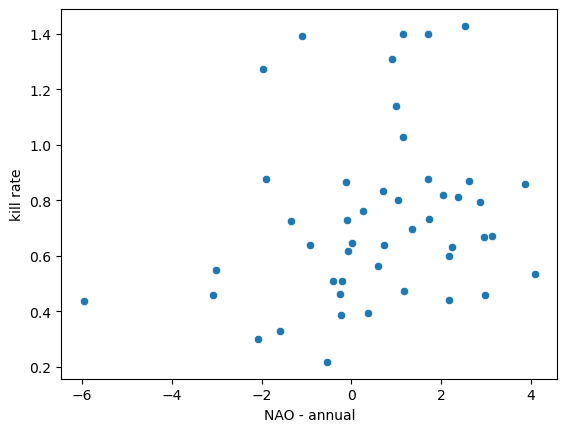

In [10]:
#NAO vs kill rate
temp = wolf_moose_yearly[wolf_moose_yearly["NAO - annual"].notna() & wolf_moose_yearly["kill rate"].notna()]
sb.scatterplot(data = temp, x = "NAO - annual", y = "kill rate")
temp["kill rate"].mean()

<Axes: xlabel='NAO (DJFM - station based)', ylabel='kill rate'>

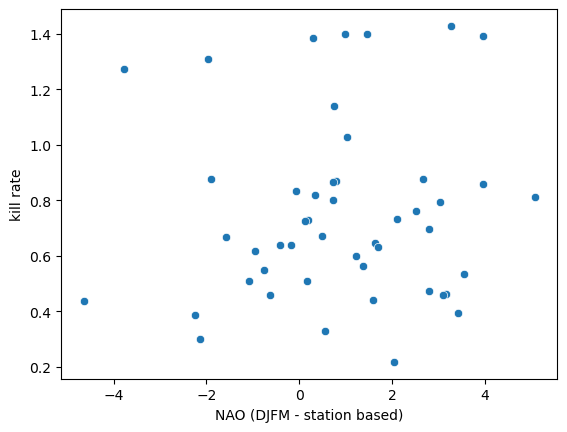

In [11]:
temp = wolf_moose_yearly[wolf_moose_yearly["NAO (DJFM - station based)"].notna() & wolf_moose_yearly["kill rate"].notna()]
sb.scatterplot(data = temp, x = "NAO (DJFM - station based)", y = "kill rate")

There seems to be a postive correlation between kill rate and the severity of winter storms. The average kill rate is 0.735.

### Summary

From my exploration of the data, I observed a couple relationships between weather severity, moose age, kill rate, and predation rate. I found that the more severe the winter weather, the kill rate for wolves was higher. From the other graph, it seems that more of the moose population is killed when they have a higher average age. There looks to be a strong correlation between moose mean age and predation age, while a less strong correlation between NAO and kill rate. Some variables that might be related to the populations of wolves and moose on Isle Royale are NAO, and moose mean age.

## Inference
### Population and Sampling

The popluation of interest that I am trying to make inferences about in this study is the moose and wolf population of Isle Royale.

The sample in this study is the observed data about the moose and wolf population of Isle Royale since 1959. The sample is a subset of the whole population of Isle Royale and is used to describe characteristics of the greater population.

### Hypothesis Testing

#### Theory

One theory I would like to test about the moose and wolf population of Isle Royale is that the kill rate of moose is lower in winters that are more severe.

The population parameter is difference of kill rate means in less severe winters and more severe winters.

The parameter space is (-inf, inf) since there are no bounds on NAO.

The null hypothesis is that the kill rate mean is lower in less severe winters (NAO >= 0) than winters that are more severe (NAO < 0).

The alternative hypothesis is that kill rate mean is greater in severe winters (NAO < 0) than winters that are less severe (NAO >= 0).

#### Application

In [12]:
#split into more severe and less severe
#select Type 1 error tolerance to 5%
temp = wolf_moose_yearly[wolf_moose_yearly["NAO (DJFM - station based)"].notna() & wolf_moose_yearly["kill rate"].notna()] #drop any missing values
wolf_moose_yearly_more_severe = temp[temp["NAO (DJFM - station based)"] < 0]
wolf_moose_yearly_less_severe = temp[temp["NAO (DJFM - station based)"] >= 0]

severe_mean = wolf_moose_yearly_more_severe["kill rate"].mean()
less_severe_mean = wolf_moose_yearly_less_severe["kill rate"].mean()
observed_statistic = less_severe_mean - severe_mean

s2 = wolf_moose_yearly_more_severe["kill rate"].var()/len(wolf_moose_yearly_more_severe) + wolf_moose_yearly_less_severe["kill rate"].var()/len(wolf_moose_yearly_less_severe)
standard_error = np.sqrt(s2)
t_statistic = observed_statistic/standard_error
t_statistic

1.005815927880391

Since the test statistic is less than 2, we will fail to reject the null hypothesis that the moose kill rate is lower in less severe winters. From this test, we can conclude that kill rate was not lower in more severe winters.

### Confidence Interval
#### Theory

Population parameter: difference of wolf population means when the mean age of the moose population excluding calves is younger vs older.

I can use a confidence interval to see if the observed values fall into the confidence interval to determine if there is a difference in mean wolf population.

confidence level: 95%

older: age > 7.5

younger: age <= 7.5

<Axes: xlabel='moose mean age excluding calves', ylabel='wolves'>

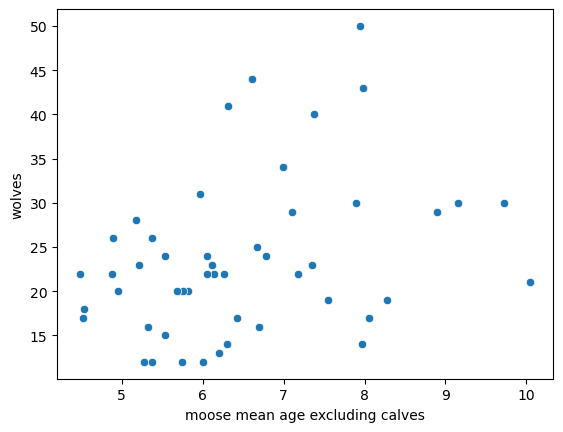

In [13]:
sb.scatterplot(data=wolf_moose_yearly, x = "moose mean age excluding calves", y = "wolves")

#### Application


In [14]:
#alpha = 5%
#split into younger and older
temp = wolf_moose_yearly[wolf_moose_yearly["moose mean age excluding calves"].notna()] #drop any missing values
wolf_moose_yearly_older = temp[temp["moose mean age excluding calves"] > 7.5]
wolf_moose_yearly_younger = temp[temp["moose mean age excluding calves"] <= 7.5]

older_mean = wolf_moose_yearly_older["wolves"].mean()
younger_mean = wolf_moose_yearly_younger["wolves"].mean()
observed_statistic = younger_mean

s2 = wolf_moose_yearly_younger["wolves"].var()/len(wolf_moose_yearly_younger)
standard_error = np.sqrt(s2)

CI = (observed_statistic - 2 * standard_error, observed_statistic + 2 * standard_error) #confidence interval of younger mean
print(CI)
print(older_mean)

(19.84951067589154, 24.939963008318987)
27.454545454545453


I found that the CI for the wolf population of a younger moose population is 19.8 yrs to 24.9 yrs old. The observed mean of the wolf population for an older population is 27.5, which is outside of the confidence interval, meaning that we would reject the null hypothesis that the wolf population is the same when the mean moose age is younger and older.

### Regression

#### Theory

Linear regression is a statistical method that models the relationship between the conditional mean of an outcome and one or more predictors as a linear function:

$$E(Y \mid x_1, x_2, \ldots ) = a + b_1 x_1 + b_2 x_2 + \ldots $$

The population of moose depends on the wolf population, kill rate, and the predation rate.

Linear regression can model the relationship between the outcome and predictors by estimating the conditional mean of the outcome (moose population) as a linear combination of the predictors (kill rate predation rate)

If b = 0, that would mean the coeffecient for a predictor is 0 which means it has no effect on the outcome.

#### Application

In [15]:
temp = wolf_moose_yearly[wolf_moose_yearly["kill rate"].notna() & wolf_moose_yearly["predation rate"].notna()] #drop any missing values

model = sm.OLS(temp["moose"], sm.add_constant(temp[["kill rate", "predation rate", "wolves"]]))
bs = model.fit().params
print(bs)

r2 = model.fit().rsquared
print(r2)

const              392.616231
kill rate          972.751681
predation rate   -5458.239397
wolves              20.700490
dtype: float64
0.673683489526199


In [16]:
wolves = 31
killrate = 0.52
predationrate = 0.1

estimated_moose = bs.iloc[0] + bs.iloc[1] * killrate + bs.iloc[2] * predationrate + bs.iloc[3] * wolves
estimated_moose

994.338370281907

From the regression test, we can see that kill rate, predation rate and wolf population all have influence on the moose population. None of the predictors had a b value of 0.

kill rate: 972.751681 * 0.01 = ~9.72 moose per percent kill rate.

predation rate: -5458.239397 * 0.01 = ~-54.58 moose per precent predation rate.

wolves: 20.70 moose per wolf.

With R^2 equal to ~0.67, these three predictors account for about 67% of the varience in the outcome.

With data taken from the 2023 study, the model estimated about 994 for the moose population. And according to the study, the observed amount was 967, an error of 27 moose.

### Classification

#### Theory

I will use a decision tree to determine if the wolf population increased from the previous year based on predation rate, moose recruitment rate, and snow depth.

A decision tree will split based on threshholds in predictor values (predation rate, moose recruitment rate, and snow depth) to reach a decision (if wolf population has increased).

The gini values of the tree will tell us if using a certain predictor will be efficient in predicting an outcome.

Using training sets to predict the rest of the data is a good way to evaluate if the model is accurate. It could have very good results on the data it was trained on but not at predicitng values outside the set resulting in an overfit model.

#### Application

0.6572222222222238


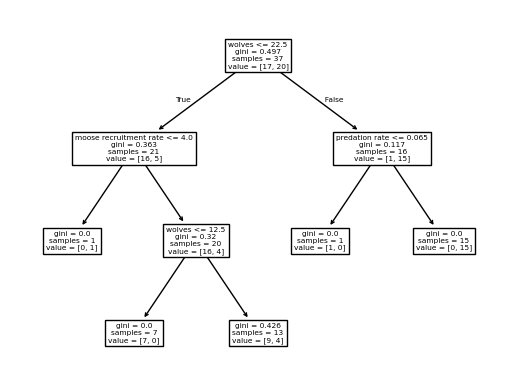

In [17]:
wolf_moose_yearly["wolves_increasing"] = wolf_moose_yearly["wolves"].diff() > 0
wolf_moose_yearly["wolves_increasing"] = wolf_moose_yearly["wolves_increasing"].astype(int)

avg_score = 0;
temp = wolf_moose_yearly[wolf_moose_yearly["predation rate"].notna() & wolf_moose_yearly["moose recruitment rate"].notna()]

for i in range(0,1000):
  training_set = temp.sample(frac = 0.8)
  testing_set = temp.drop(training_set.index)

  training_set.sort_values(by = "year", inplace = True)
  testing_set.sort_values(by = "year", inplace = True)

  tree = skt.DecisionTreeClassifier(max_depth = 3)
  tree.fit(training_set[["predation rate", "moose recruitment rate", "wolves"]], training_set["wolves_increasing"])


  avg_score += tree.score(testing_set[["predation rate", "moose recruitment rate", "wolves"]], testing_set["wolves_increasing"])

skt.plot_tree(tree, feature_names = ["predation rate", "moose recruitment rate", "wolves"])
print(avg_score/1000)

The tree created to predict if the wolf population will increase from the previous year from the predictors of moose recruitment rate, wolf population, and predation rate using a max depth of 3.

From the testing data, which is 80% of the wolf_moose_yearly data with missing values dropped, the tree produced a model that has an average of ~65% accuracy on the rest of the set run 1000 times.

## Conclusion

From my univariate exploration, I found that the average moose dies at 12 years old and that most values of cranial volume of dead moose fall between 1500 and 1700 cm3 with peaks at ~1600cm3 and ~1990cm3.

From multivariate exploration, I observed that the predation rate of the moose increases when their average age is higher and that the population of wolves peaked in 1980 at 50 wolves.

In the next section, I tested if kill rate was lower in more severe winters than less severe winters. From this hypothesis test, I found that kill rate was not lower in more severe winters since the test statistic was less than 2 standard errors away from the kill rate in less severe winters.

In a confidence interval test, I found that the 95% CI for the wolf population of a younger moose population is 19.8 yrs to 24.9 yrs old. The observed mean of the wolf population for an older population is 27.5, which is outside of the confidence interval, meaning that we would reject the null hypothesis that the wolf population is the same when the mean moose age is younger and older.

From the regression test, I found that kill rate, predation rate and wolf population all have influence on the moose population. None of the predictors had a b value of 0 and with R^2 equal to ~0.67, these three predictors account for about 67% of the varience in the outcome. I used the constants from the test to predict the number of moose in 2023 with an error of 27 moose.

Finally, in classification, the tree created to predict if the wolf population will increase from the previous year from the predictors of moose recruitment rate, wolf population, and predation rate using a max depth of 3 resulted in a model with ~65% accuracy. The tree was created from a sample of the data set (80% used for training and 20% for testing after dropping NA values) and rerun 1000 times to get an average accuracy since the training and testing set was random.

One thing that could be improved upon is data cleaning. Dropping all rows with missing values may not be the best solution here. One way to fix this could be using methods of imputation for missing data, which would give access to more data and more accurate analysis.